In [1]:
#import the required modules
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# read data from the csv file
train_data = pd.read_csv("train.csv")

# Data Exploration

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# getting the information of the data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# checking for missing value 
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data processing

In [7]:
# dropping the cabin column since very large portion is missing
train_data.drop("Cabin", axis = 1, inplace = True)

#dropping invalid Age values
train_data = train_data[(train_data['Age'] >= 1) & (train_data['Age'] <= 100)]

# Impute the missing value in Age with the median
train_data["Age"].fillna(train_data["Age"].median, inplace = True)

# Replacing the null values in Embarked with the most common category
most_common_embarked = train_data["Embarked"].mode()[0]
train_data["Embarked"].fillna(most_common_embarked, inplace = True)

# Feature Engineering and Data Visualization

In [8]:
# Encode categorical variables
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)

In [9]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 707 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  707 non-null    int64  
 1   Survived     707 non-null    int64  
 2   Pclass       707 non-null    int64  
 3   Name         707 non-null    object 
 4   Age          707 non-null    float64
 5   SibSp        707 non-null    int64  
 6   Parch        707 non-null    int64  
 7   Ticket       707 non-null    object 
 8   Fare         707 non-null    float64
 9   Sex_male     707 non-null    uint8  
 10  Embarked_Q   707 non-null    uint8  
 11  Embarked_S   707 non-null    uint8  
dtypes: float64(2), int64(5), object(2), uint8(3)
memory usage: 57.3+ KB


In [11]:
# Converting Age which is of type object to a numeric type
train_data["Age"] = pd.to_numeric(train_data["Age"], errors = "coerce")
train_data["Ticket"] = pd.to_numeric(train_data["Ticket"], errors = "coerce")

In [12]:
# Selecting features
features = ["PassengerId","Pclass","Age","SibSp","Parch","Fare","Sex_male","Embarked_Q", "Embarked_S"]


Investigating the correlation of the features

In [13]:
corr_features = features + ["Survived"]
# Calculate the correlation matrix
correlation_matrix = train_data[corr_features].corr()
correlation_matrix

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Survived
PassengerId,1.000000,-0.039190,0.046289,-0.086815,-0.011259,0.013769,0.024178,-0.026285,0.010037,0.024698
Pclass,-0.039190,1.000000,-0.376786,0.065672,0.028462,-0.552597,0.161599,0.133017,0.206259,-0.364245
Age,0.046289,-0.376786,1.000000,-0.305371,-0.173905,0.099329,0.098934,-0.026937,-0.034119,-0.054818
SibSp,-0.086815,0.065672,-0.305371,1.000000,0.384597,0.139230,-0.099451,0.052923,0.024667,-0.023922
Parch,-0.011259,0.028462,-0.173905,0.384597,1.000000,0.203426,-0.253300,-0.007168,0.014260,0.082442
Fare,0.013769,-0.552597,0.099329,0.139230,0.203426,1.000000,-0.188626,-0.062925,-0.256344,0.270619
Sex_male,0.024178,0.161599,0.098934,-0.099451,-0.253300,-0.188626,1.000000,-0.026231,0.100885,-0.547208
Embarked_Q,-0.026285,0.133017,-0.026937,0.052923,-0.007168,-0.062925,-0.026231,1.000000,-0.383220,-0.047485
Embarked_S,0.010037,0.206259,-0.034119,0.024667,0.014260,-0.256344,0.100885,-0.383220,1.000000,-0.153202
Survived,0.024698,-0.364245,-0.054818,-0.023922,0.082442,0.270619,-0.547208,-0.047485,-0.153202,1.000000


# Data Visualization

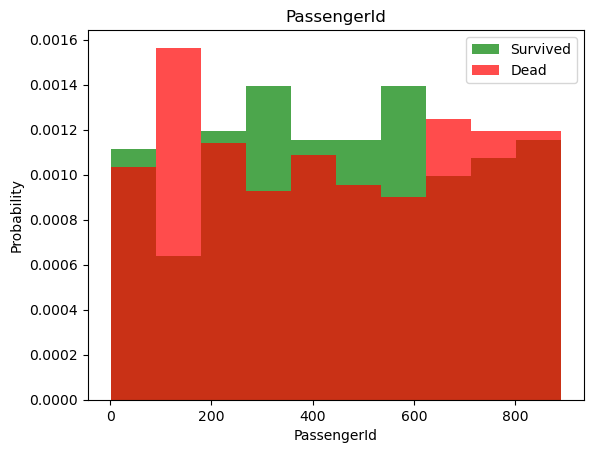

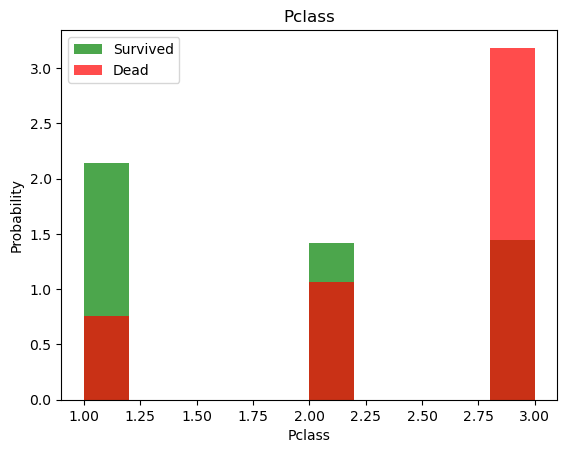

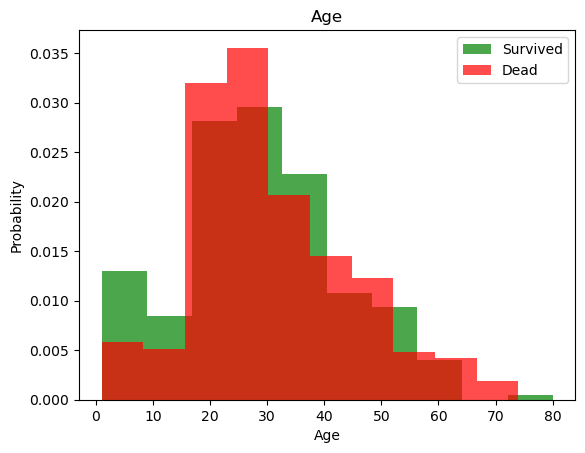

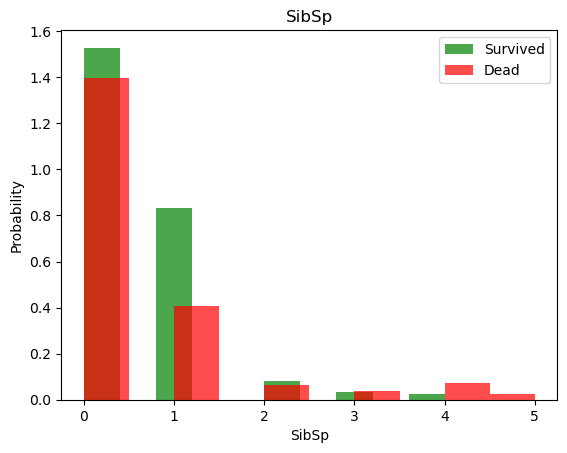

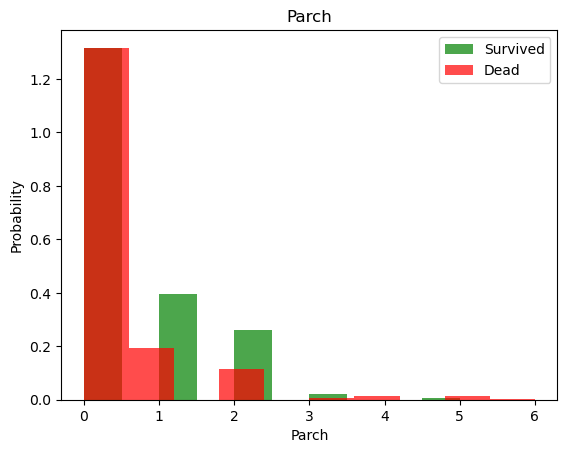

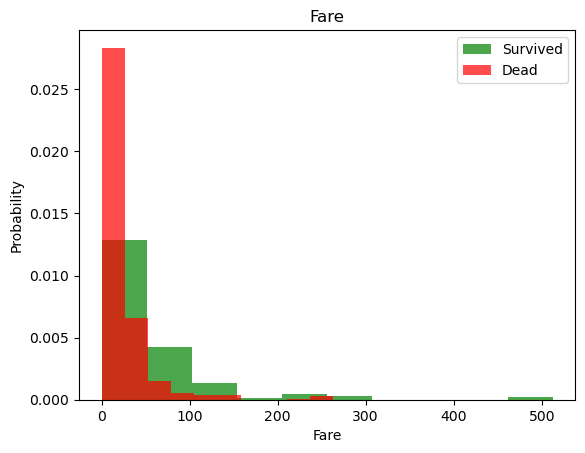

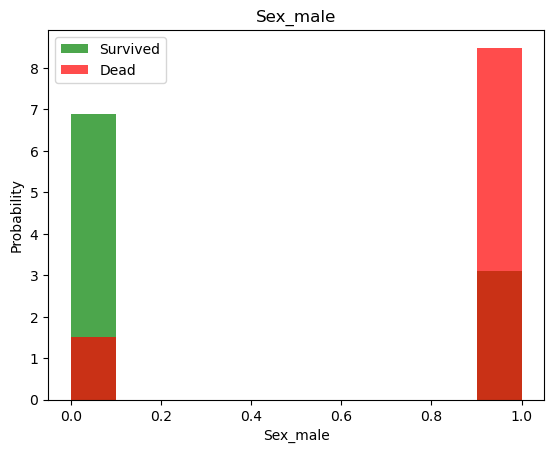

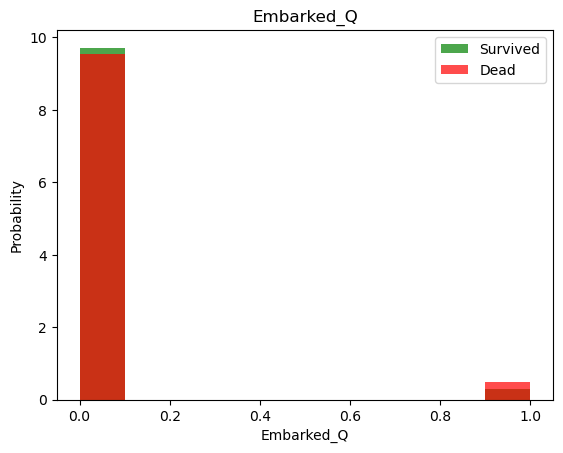

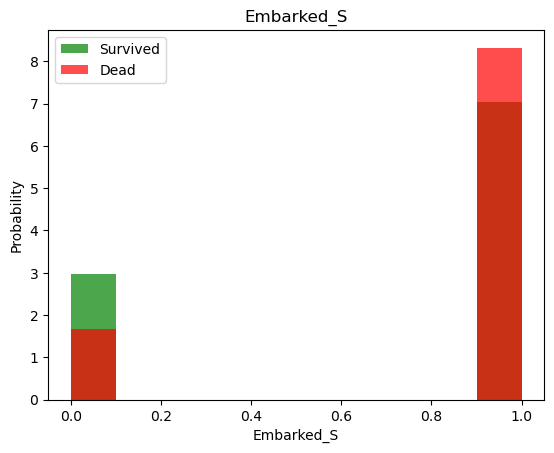

In [14]:
for feature in features:
    plt.hist(train_data[train_data["Survived"] == 1][feature], color = "green", label = "Survived", alpha = 0.7, density = True)
    plt.hist(train_data[train_data["Survived"] == 0][feature], color = "red", label = "Dead", alpha = 0.7, density = True)
    plt.title(feature)
    plt.ylabel("Probability")
    plt.xlabel(feature)
    plt.legend()
    plt.show()

In [15]:
# input and output variable selection
x_input = train_data[features]
y_output = train_data["Survived"]

In [16]:
# Splitting the data into train and test(80% for train data and 20% for tes data)
x_train, x_test, y_train, y_test = train_test_split(x_input, y_output, test_size=0.2, random_state=42)

In [17]:
# Scaling using Z-score normalization 
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Model selection and training (Random Forest Classifier)

In [18]:
# Model Selection and Training
model = RandomForestClassifier(random_state=42)
model.fit(x_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [19]:
y_pred = model.predict(x_test_scaled)

In [20]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.795774647887324
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84        92
           1       0.71      0.70      0.71        50

    accuracy                           0.80       142
   macro avg       0.78      0.77      0.78       142
weighted avg       0.79      0.80      0.80       142



# Hyperparameter Tuning using Grid Search

In [30]:
from sklearn.model_selection import GridSearchCV

In [36]:
param_grid = {
    "n_estimators" : [50, 100, 200],
    "max_depth" : [None, 10, 20, 30],
    "min_samples_split" : [2, 5, 10],
    "min_samples_leaf" : [1, 2, 4]
}

grid_search = GridSearchCV(estimator = model,
                          param_grid = param_grid,
                          cv = 5,
                          scoring = "accuracy",
                          n_jobs = 1
                          )
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Test Accuracy: 0.8098591549295775
